###  SIMPLE LINEAR REGRESSION (advertising.csv)

#### importing libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

#### getting data set

In [2]:
df = pd.read_csv('datasets/Advertising.csv', index_col = 0)
cols = df.columns[:-1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#print(X[:, 1])
#print(df)

#### splitting the data set into train and test (70/30)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

#### feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#always fir_transform on training set and as testing set is unseen, we'll use transform to normalise
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### training SLR model on training set

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def trainModel(X, y, regressor):
#     print(type(X))
#     print(type(X[:,0]))
    B0 = {}
    Bi = {}
    train_MSE = {}
    y_train_pred = {}
    for i in range(3):
        
        x = X[:,i].reshape(-1, 1)
        regressor.fit(x, y)
        B0[cols[i]] = regressor.intercept_
        Bi[cols[i]] = regressor.coef_
        y_train_pred[cols[i]] = regressor.predict(x)
        train_MSE[cols[i]] = mean_squared_error(y_train, y_train_pred[cols[i]])
        print("intercept for {}: {}".format(cols[i], B0[cols[i]]))
        print("coefficient for {}: {}\n".format(cols[i], Bi[cols[i]]))
    return (B0, Bi, train_MSE, y_train_pred)
    
    

In [6]:
regressor = LinearRegression()
B0, Bi, train_MSE, y_train_pred = trainModel(X_train, y_train, regressor)



intercept for TV: 13.88
coefficient for TV: [3.78812774]

intercept for Radio: 13.879999999999999
coefficient for Radio: [2.52963503]

intercept for Newspaper: 13.879999999999999
coefficient for Newspaper: [0.54754286]



#### using model to predict against the test data set

In [7]:
est_y = {}
test_MSE = {}
for i in range(3):
    x = X_test[:, i].reshape(-1, 1).round(2)
    est_y[cols[i]] = regressor.predict(x).round(2)
    test_MSE[cols[i]] = mean_squared_error(y_test, est_y[cols[i]])
#print("{} : {}".format(est_y['TV'], y_test))

#### calculating accuracy using R^2 and comparing train and test MSE

In [8]:
from sklearn.metrics import r2_score
r2_test = {}
r2_train = {}
for i in range(3):
    r2_train[cols[i]] = r2_score(y_train, regressor.predict(X_train[:, i].reshape(-1,1))).round(4)
    r2_test[cols[i]] = r2_score(y_test, est_y[cols[i]]).round(4)
    print("{}:\n".format(cols[i]))
    print("train MSE: {}\ntest MSE: {}\n".format(train_MSE[cols[i]], test_MSE[cols[i]]))
    print("train R^2: {}\ntest R^2: {}\n\n".format(r2_train[cols[i]], r2_test[cols[i]]))
#as the output suggest, train MSE < test MSE. we'll use regularization to improve this values

TV:

train MSE: 10.695259689789301
test MSE: 26.80953333333333

train R^2: 0.1537
test R^2: 0.154


Radio:

train MSE: 18.646118019162408
test MSE: 27.822358333333334

train R^2: 0.0986
test R^2: 0.122


Newspaper:

train MSE: 24.745368250212845
test MSE: 29.11670333333333

train R^2: 0.012
test R^2: 0.0812




#### visualising train data set

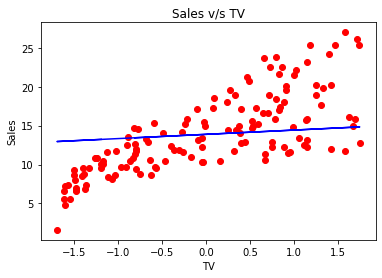

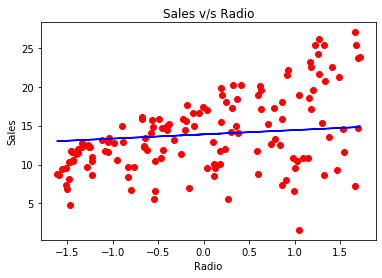

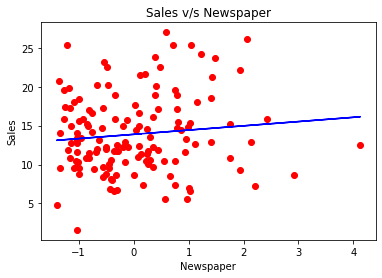

In [9]:
for i in range(3):
    plt.scatter(X_train[:,i] , y_train, color = 'red')
    plt.plot(X_train[:, i], regressor.predict(X_train[:, i].reshape(-1,1)), color='blue')
    plt.title('Sales v/s {}'.format(cols[i]))
    plt.xlabel('{}'.format(cols[i]))
    plt.ylabel("Sales")
    plt.show()

#### visualising test data set

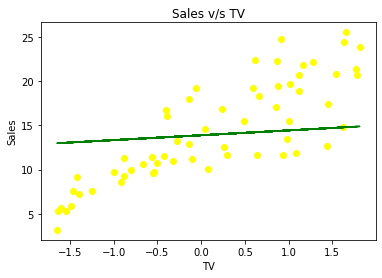

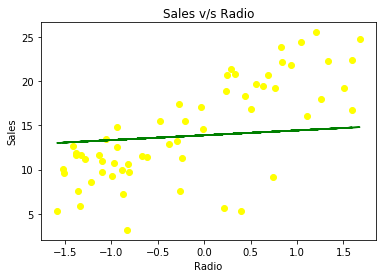

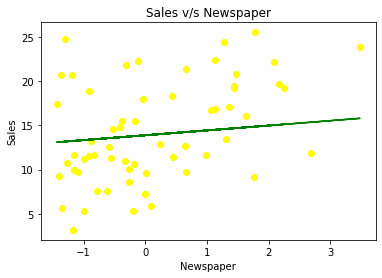

In [10]:
for i in range(3):
    plt.scatter(X_test[:,i] , y_test, color = 'yellow')
#    plt.plot(X_train[:, i], regressor.predict(X_train[:, i].reshape(-1,1)), color='blue')
    plt.plot(X_test[:, i], est_y[cols[i]], color='green')
    plt.title('Sales v/s {}'.format(cols[i]))
    plt.xlabel('{}'.format(cols[i]))
    plt.ylabel("Sales")
    plt.show()

### Regularization

In [11]:
from sklearn.linear_model import Lasso, Ridge

def trainModel(X, y, regressor):
    B0 = {}
    Bi = {}
    train_MSE = {}
    y_train_pred = {}
    for i in range(3):
        
        x = X[:,i].reshape(-1, 1)
        regressor.fit(x, y)
        B0[cols[i]] = regressor.intercept_
        Bi[cols[i]] = regressor.coef_
        y_train_pred[cols[i]] = regressor.predict(x)
        train_MSE[cols[i]] = mean_squared_error(y_train, y_train_pred[cols[i]])
        print("intercept for {}: {}".format(cols[i], B0[cols[i]]))
        print("coefficient for {}: {}\n".format(cols[i], Bi[cols[i]]))
    return (B0, Bi, train_MSE, y_train_pred)
    
    

In [12]:
rr = Ridge()
B0_rr, Bi_rr, train_MSE_rr, y_train_pred_rr = trainModel(X_train, y_train, rr)

lr = Lasso()
B0_lr, Bi_lr, train_MSE_lr, y_train_pred_lr = trainModel(X_train, y_train, lr)

intercept for TV: 13.88
coefficient for TV: [3.76126158]

intercept for Radio: 13.879999999999999
coefficient for Radio: [2.51169436]

intercept for Newspaper: 13.879999999999999
coefficient for Newspaper: [0.54365957]

intercept for TV: 13.88
coefficient for TV: [2.78812774]

intercept for Radio: 13.879999999999999
coefficient for Radio: [1.52963503]

intercept for Newspaper: 13.879999999999999
coefficient for Newspaper: [0.]



#### predicting y using the trained ridge and lasso regression model

In [13]:
est_y_rr = {}
test_MSE_rr = {}
est_y_lr = {}
test_MSE_lr = {}
for i in range(3):
    x = X_test[:, i].reshape(-1, 1).round(2)
    
    est_y_rr[cols[i]] = rr.predict(x).round(2)
    test_MSE_rr[cols[i]] = mean_squared_error(y_test, est_y_rr[cols[i]])
    
    est_y_lr[cols[i]] = lr.predict(x).round(2)
    test_MSE_lr[cols[i]] = mean_squared_error(y_test, est_y_lr[cols[i]])


#### calculating R2 and MSE for train and test

In [14]:
from sklearn.metrics import r2_score

r2_test_rr = {}
r2_train_rr = {}
r2_test_lr = {}
r2_train_lr = {}

for i in range(3):
    
    r2_train_rr[cols[i]] = r2_score(y_train, rr.predict(X_train[:, i].reshape(-1,1))).round(4)
    r2_test_rr[cols[i]] = r2_score(y_test, est_y_rr[cols[i]]).round(4)
    
    r2_train_lr[cols[i]] = r2_score(y_train, lr.predict(X_train[:, i].reshape(-1,1))).round(4)
    r2_test_lr[cols[i]] = r2_score(y_test, est_y_lr[cols[i]]).round(4)
    
    print("{}:\n".format(cols[i]))
    print("Ridge:\n\ttrain MSE: {}\n\ttest MSE: {}\n".format(train_MSE_rr[cols[i]], test_MSE_rr[cols[i]]))
    print("\ttrain R^2: {}\n\ttest R^2: {}\n".format(r2_train_rr[cols[i]], r2_test_rr[cols[i]]))
    
    print("Lasso:\n\ttrain MSE: {}\n\ttest MSE: {}\n".format(train_MSE_lr[cols[i]], test_MSE_lr[cols[i]]))
    print("\ttrain R^2: {}\n\ttest R^2: {}\n".format(r2_train_lr[cols[i]], r2_test_lr[cols[i]]))

TV:

Ridge:
	train MSE: 10.695981480028163
	test MSE: 26.844583333333333

	train R^2: 0.1527
	test R^2: 0.1529

Lasso:
	train MSE: 11.695259689789301
	test MSE: 31.914766666666665

	train R^2: 0.0
	test R^2: -0.0071

Radio:

Ridge:
	train MSE: 18.646439886946194
	test MSE: 27.838756666666665

	train R^2: 0.098
	test R^2: 0.1215

Lasso:
	train MSE: 19.64611801916241
	test MSE: 31.914766666666665

	train R^2: 0.0
	test R^2: -0.0071

Newspaper:

Ridge:
	train MSE: 24.74538333009708
	test MSE: 29.126899999999996

	train R^2: 0.012
	test R^2: 0.0809

Lasso:
	train MSE: 25.045171428571425
	test MSE: 31.914766666666665

	train R^2: 0.0
	test R^2: -0.0071

